In [1]:
import pandas as pd
import scipy
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('sell_result/sell_table_2.csv')

In [3]:
df = df.iloc[:, 1:]

Drop some very suspicious flats

In [4]:
df = df[df.index != 746]

In [5]:
df[df['Price_duplicate'] < 100000]

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
477,55.711153,37.499255,7,Раменки,6,1,1,350,21,211,...,NaN,NaN,NaN,1,1,1,3,4,0,http://www.cian.ru/sale/flat/1989164/
8852,55.705529,37.492796,7,NaN,2,20500,20500,82,32,50,...,Университет,10,0,NaN,0,1,11,18,0,http://www.cian.ru/sale/flat/151576825/


In [6]:
df = df[df['Price_duplicate'] > 100000].copy()

In [7]:
df.head()

,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
0,55.536573,37.158982,10,NaN,2,6800000,6800000,73.2,14.4,40.2,...,Тропарево,15,0,NaN,0,1,3,4,0,http://www.cian.ru/sale/flat/148936137/
1,55.823156,37.500881,1,NaN,2,9600000,9600000,55.0,10.0,35.0,...,Войковская,5,1,NaN,0,0,3,6,0,http://www.cian.ru/sale/flat/2462671/
2,55.878750,37.538587,1,NaN,2,7529815,7529815,61.2,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,2,21,1,http://www.cian.ru/sale/flat/43992990/
3,55.739336,37.705275,4,Нижегородский,1,4150000,4150000,30.0,6.5,18.5,...,Авиамоторная,24,1,1,1,0,1,5,0,http://www.cian.ru/sale/flat/151019032/
4,55.670757,37.587712,6,Котловка,2,6000000,6000000,42.0,NaN,31.0,...,Профсоюзная,5,0,0,0,1,5,5,0,http://www.cian.ru/sale/flat/151011793/


In [8]:
df.describe()

,Lat,Lon,District,Rooms,Price,Price_duplicate,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New
count,8976.000000,8976.000000,8976.000000,8976.000000,8.936000e+03,8.976000e+03,8976.000000,4682.000000,8124.000000,8976.000000,7753.000000,7753.000000,5179.000000,8976.000000,8976.000000,8974.000000,8872.000000,8976.000000
mean,55.701833,37.555109,4.962344,1.737968,8.678554e+06,9.361381e+06,51.532331,11.041969,30.231622,816.213368,11.907133,0.639752,0.466113,0.323864,0.688168,7.236572,14.033476,0.312277
std,0.125865,0.178549,3.152560,0.806361,8.620624e+06,1.881076e+07,24.294454,4.326978,16.915364,620.324935,8.721741,0.480103,0.498899,0.467975,0.463267,6.016571,8.306651,0.463448
min,55.211897,36.857813,0.000000,1.000000,8.000000e+05,8.000000e+05,13.000000,2.200000,8.300000,0.023350,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,55.616659,37.457016,2.000000,1.000000,5.500000e+06,5.500000e+06,38.000000,8.600000,19.000000,332.670916,7.000000,0.000000,0.000000,0.000000,0.000000,3.000000,9.000000,0.000000
50%,55.718188,37.560071,5.000000,2.000000,6.900000e+06,6.900000e+06,45.000000,10.000000,28.000000,724.405794,10.000000,1.000000,0.000000,0.000000,1.000000,5.000000,12.000000,0.000000
75%,55.801498,37.671938,8.000000,2.000000,9.300000e+06,9.318255e+06,58.500000,12.300000,35.000000,1115.329089,15.000000,1.000000,1.000000,1.000000,1.000000,10.000000,17.000000,1.000000
max,56.002813,37.940921,11.000000,6.000000,1.864940e+08,1.130804e+09,513.000000,64.000000,312.000000,3744.545827,180.000000,1.000000,1.000000,1.000000,1.000000,49.000000,85.000000,1.000000


Check data for NaNs

In [9]:
for c in df.columns:
    print(c, len(df[c][df[c].isnull()]))

Lat 0
Lon 0
District 0
Small_district 3797
Rooms 0
Price 40
Price_duplicate 0
Totsp 0
Livesp 4294
Kitsp 852
Dist 0
Stname 1223
Metrdist 1223
Walk 1223
Brick 3797
Tel 0
Bal 0
Floor 2
Nfloors 104
New 0
Link 0


Variables we have:

- Lat, Lon - широта и долгота
- District - округ
- Small_district - район
- Stname - название станции ближайшего метро
- Rooms – число комнат
- Price – цена
- Price_duplicate – цена (з скрытого тега)
- Totsp – общая площадь квартиры, кв. м.
- Livesp – жилая площадь квартиры, кв. м.
- Kitsp – площадь кухни, кв. м.
- Dist – расстояние от центра в км.
- Metrdist – расстояние до метро в минутах
- Walk – 1 – если пешком от метро, 0 – если на транспорте
- Brick – 1 – кирпичный/монолит/жб, 0 – другой
- Tel – 1 – если есть, 0 – нет
- Bal – 1 – есть балкон/лоджия, 0 – нет
- Floor – номер этажа, на котором расположена квартира
- Nfloors – всего этажей в доме
- New – 1 – первичный рынок, 0 - вторичка
- Link - ссылка на сайт

## Visualization part

### Our flats

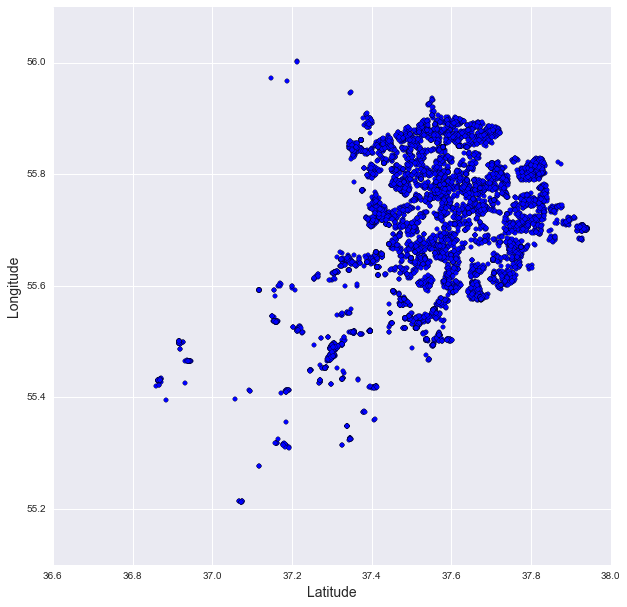

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df['Lon'], df['Lat'])
plt.ylabel ('Longitude', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.show()

### CorrPlot

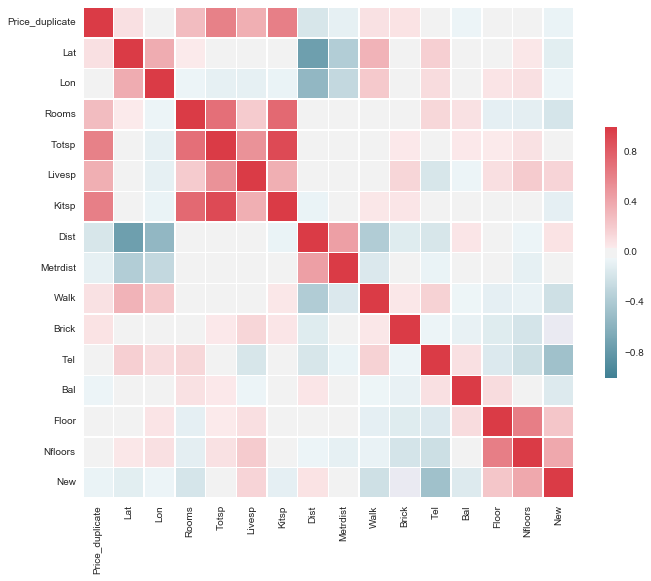

In [13]:
data = df[['Price_duplicate', 'Lat', 'Lon', 'Rooms', 'Totsp', 'Livesp', 'Kitsp', 'Dist', 'Metrdist', 'Walk', 'Brick',\
           'Tel', 'Bal', 'Floor', 'Nfloors', 'New']]

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, ax=ax)

### Price visualizing

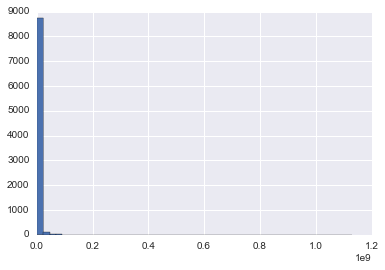

In [127]:
plt.hist(df['Price_duplicate'], bins=50)
plt.show()

In [296]:
from mpl_toolkits.mplot3d import Axes3D

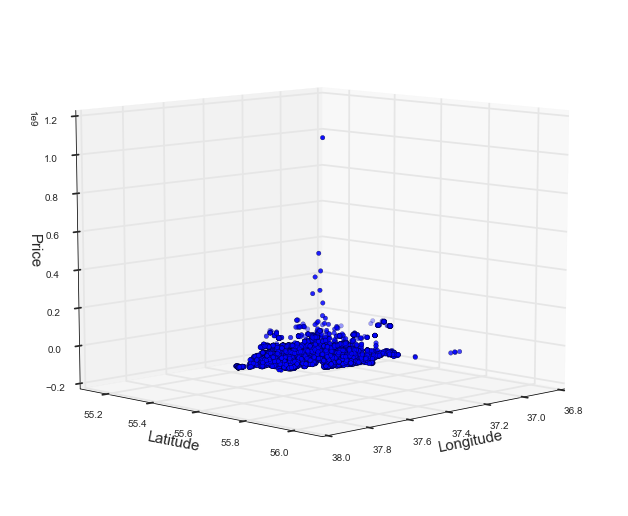

In [305]:
fig = plt.figure(figsize=(11,9))
ax = fig.gca(projection='3d',  axisbg='white')

x = df['Lon']
y = df['Lat']
z = df['Price_duplicate']

ax.scatter(x, y, z)

ax.view_init(elev=10, azim=45)
ax.dist=10
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
ax.set_zlabel('Price', fontsize=15)

plt.show()

#### We can see that there are some very expensive flats.

#### We will visualize them separetly.

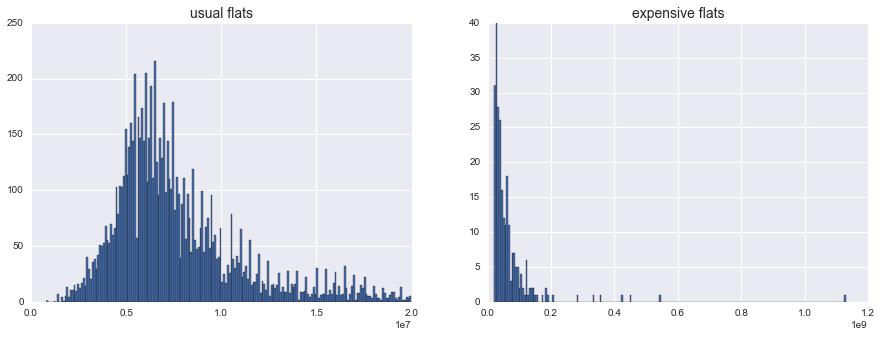

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(np.array(df[df['Price_duplicate']<0.02*1e9]['Price_duplicate']), bins=200)
axes[0].set_title("usual flats", fontsize=14)
axes[1].hist(np.array(df[df['Price_duplicate']>=0.02*1e9]['Price_duplicate']), bins=200)
axes[1].set_title("expensive flats", fontsize=14)

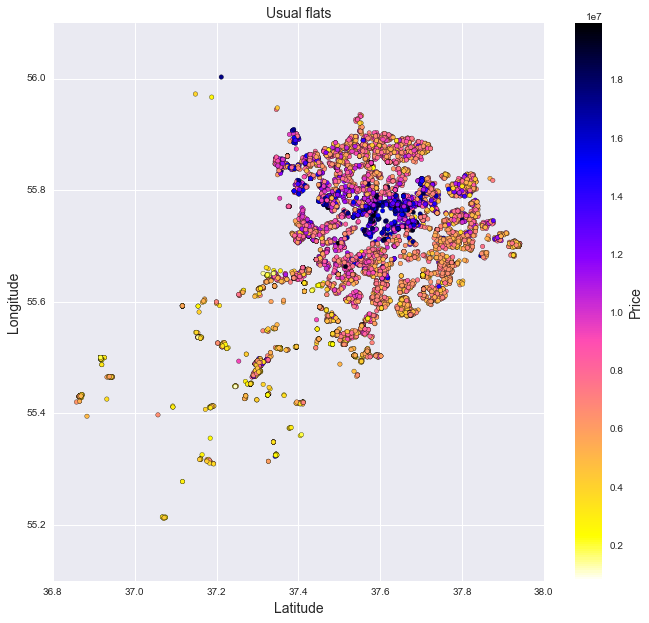

In [170]:
fig, ax = plt.subplots(figsize=(11,10))
s = ax.scatter(df[df['Price_duplicate']<0.02*1e9]['Lon'], df[df['Price_duplicate']<0.02*1e9]['Lat'],
               c=df[df['Price_duplicate']<0.02*1e9]['Price_duplicate'],
               cmap=plt.cm.gnuplot2_r)
cbar = plt.colorbar(mappable = s, ax = ax)
cbar.set_label('Price', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Usual flats', fontsize=14)
plt.show()

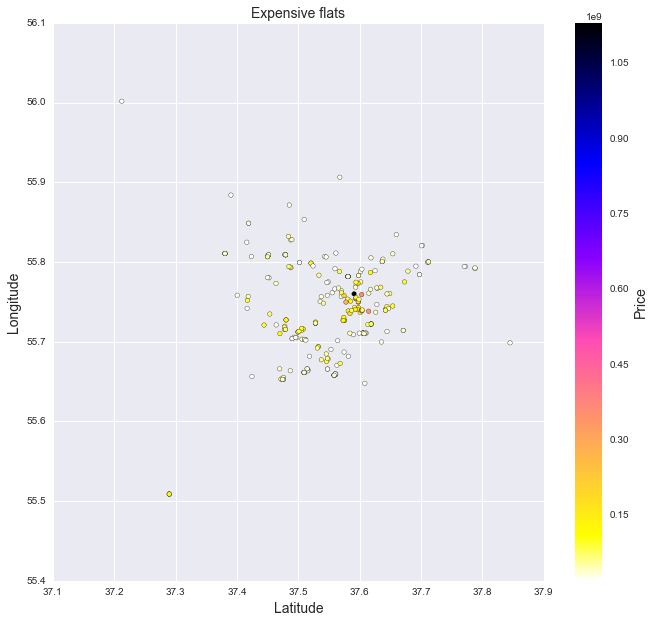

In [171]:
fig, ax = plt.subplots(figsize=(11,10))
s = ax.scatter(df[df['Price_duplicate']>=0.02*1e9]['Lon'],
               df[df['Price_duplicate']>=0.02*1e9]['Lat'],
               c=df[df['Price_duplicate']>=0.02*1e9]['Price_duplicate'],
               cmap=plt.cm.gnuplot2_r)
cbar = plt.colorbar(mappable = s, ax = ax)
cbar.set_label('Price', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Expensive flats', fontsize=14)
plt.show()

#### We can see the outlier. Next scatter is the same as previous, but with upper bound of price (<0.25*1e9)

In [175]:
lim = (df['Price_duplicate']>=0.02*1e9) & (df['Price_duplicate']<=0.25*1e9)

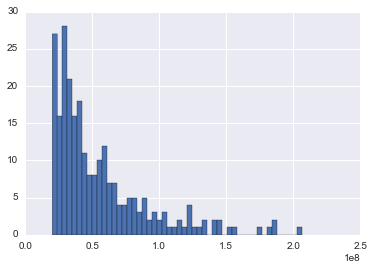

In [182]:
plt.hist(np.array(df[lim]['Price_duplicate']), bins=50)
plt.show()

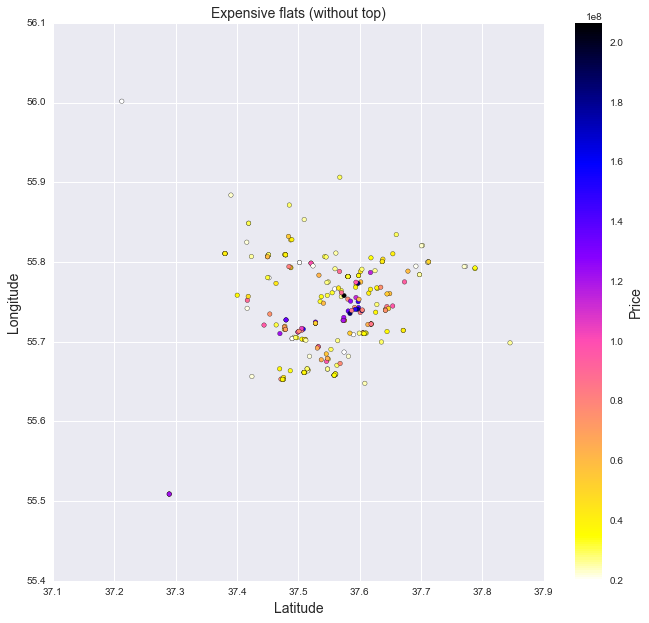

In [184]:
fig, ax = plt.subplots(figsize=(11,10))
s = ax.scatter(df[lim]['Lon'],
               df[lim]['Lat'],
               c=df[lim]['Price_duplicate'],
               cmap=plt.cm.gnuplot2_r)
cbar = plt.colorbar(mappable = s, ax = ax)
cbar.set_label('Price', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Expensive flats (without top)', fontsize=14)
plt.show()

### Let's look on Totsp, Metrdist, Dist

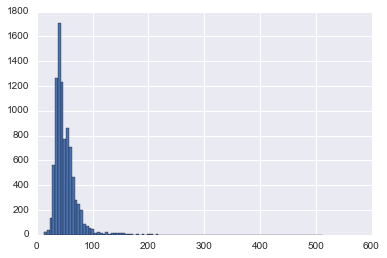

In [196]:
plt.hist(np.array(df['Totsp']), bins=100)
plt.show()

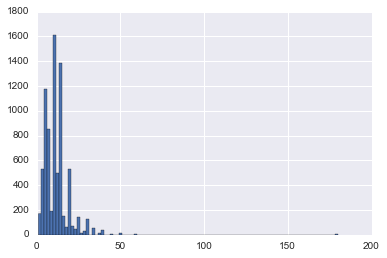

In [195]:
plt.hist(np.array(df['Metrdist'].dropna()), bins=100)
plt.show()

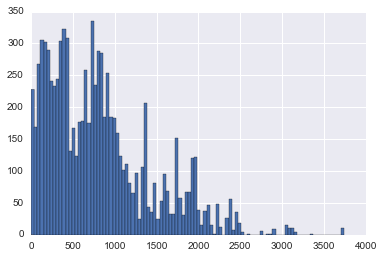

In [197]:
plt.hist(np.array(df['Dist']), bins=100)
plt.show()

### Some dapandencies on scatterplot

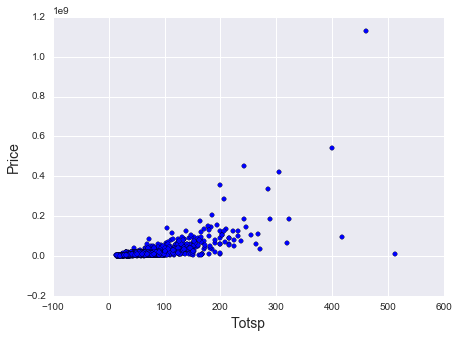

In [208]:
plt.figure(figsize=(7,5))
plt.scatter(df['Totsp'], df['Price_duplicate'])
plt.xlabel('Totsp', fontsize=14)
plt.ylabel('Price', fontsize=14)

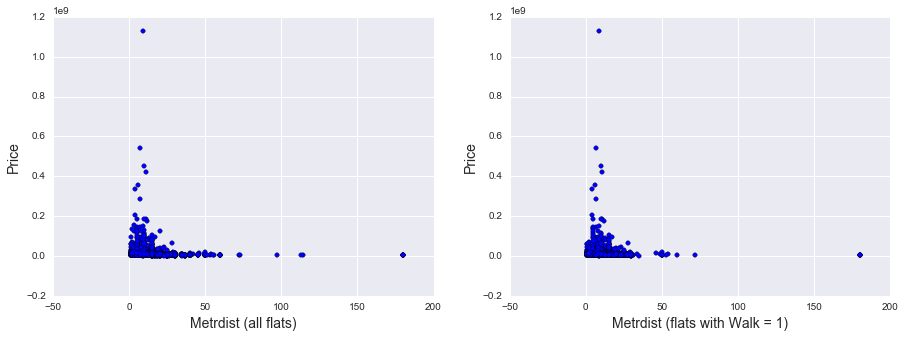

In [219]:
df_walk_one = df[df['Walk']==1]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(df['Metrdist'], df['Price_duplicate'])
axes[0].set_xlabel('Metrdist (all flats)', fontsize=14)
axes[0].set_ylabel('Price', fontsize=14)
axes[1].scatter(df_walk_one['Metrdist'], df_walk_one['Price_duplicate'])
axes[1].set_xlabel('Metrdist (flats with Walk = 1)', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)

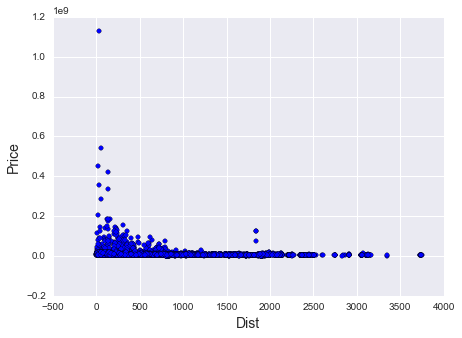

In [221]:
plt.figure(figsize=(7,5))
plt.scatter(df['Dist'], df['Price_duplicate'])
plt.xlabel('Dist', fontsize=14)
plt.ylabel('Price', fontsize=14)